In [43]:
import numpy as np 
import pandas as pd 
import cv2
import PIL.Image as Image
import os 
import matplotlib.pyplot as plt 
import pathlib
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers,Sequential
from sklearn.model_selection import train_test_split
print("all set ")

all set 


In [44]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos",origin=dataset_url,untar=True)
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/jaikr/.keras/datasets/flower_photos')

In [45]:
path = r"C:/Users/jaikr/.keras/datasets/flower_photos"
path

'C:/Users/jaikr/.keras/datasets/flower_photos'

In [46]:
data_dir = pathlib.Path(path)
data_dir

WindowsPath('C:/Users/jaikr/.keras/datasets/flower_photos')

In [47]:
for i in data_dir.iterdir():
    print(i)

C:\Users\jaikr\.keras\datasets\flower_photos\daisy
C:\Users\jaikr\.keras\datasets\flower_photos\dandelion
C:\Users\jaikr\.keras\datasets\flower_photos\flower_photos
C:\Users\jaikr\.keras\datasets\flower_photos\LICENSE.txt
C:\Users\jaikr\.keras\datasets\flower_photos\roses
C:\Users\jaikr\.keras\datasets\flower_photos\sunflowers
C:\Users\jaikr\.keras\datasets\flower_photos\tulips


In [48]:
##preparing dataset 
flower_dict = {
    "roses" : list(data_dir.glob("roses/*")),
    'daisy' : list(data_dir.glob("daisy/*")),
    "dandelion" : list(data_dir.glob("dandelion/*")),
    "sunflowers" : list(data_dir.glob("sunflowers/*")),
    "tulips" : list(data_dir.glob("tulips/*"))
}

In [49]:
##label encoding 
flowers_label = {
    "roses" : 0,
    "daisy" : 1,
    "dandelion" : 2,
    "sunflowers" : 3,
    "tulips" : 4
}

In [50]:
flower_dict["sunflowers"][0]

WindowsPath('C:/Users/jaikr/.keras/datasets/flower_photos/sunflowers/1008566138_6927679c8a.jpg')

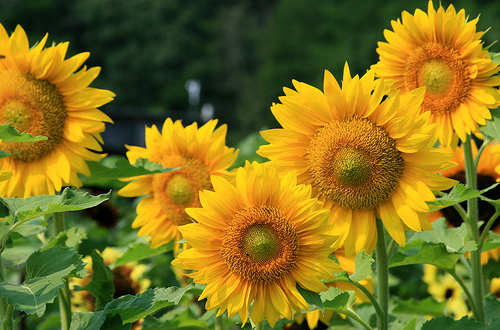

In [51]:
Image.open(flower_dict["sunflowers"][0])

In [52]:
no_of_classes = len(flower_dict.items())
no_of_classes

5

In [53]:
x , y = [],[]
for key , value in flower_dict.items():
    for item in value:
        img = cv2.imread(str(item))
        reduced_image = cv2.resize(img,(224,224))
        x.append(reduced_image)
        y.append(flowers_label[key])

In [54]:
x = np.array(x)
y = np.array(y)

In [55]:
x.shape, y.shape

((3670, 224, 224, 3), (3670,))

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [57]:
##normalise 
x_train_scaled = x_train/255
x_test_scaled = x_test/255

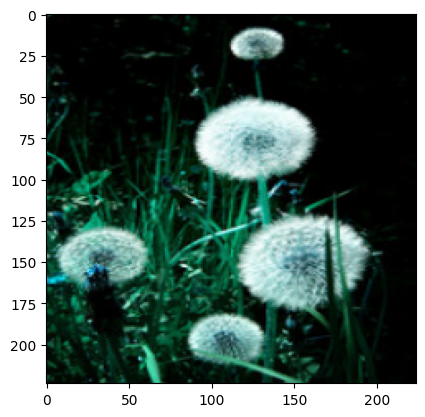

In [58]:
plt.imshow(x_train_scaled[52])
plt.show()

In [ ]:
##cnn model 
model = Sequential([
    ##convo layers 
    layers.Conv2D(32,(3,3),activation = "relu",input_shape = (224,224,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation = "relu"),

    ##flatten layer 
    layers.Flatten(),

    ##dense layer 
    layers.Dense(64,activation="relu"),
    layers.Dense(no_of_classes,activation="softmax")

])

model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

model.summary()